In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit as emilio

In [2]:
Arrefecimento_Data = pd.read_csv("ArrefData.csv", delimiter = ";") #1
Aquecimento_Data = pd.read_csv("AqueData.csv", delimiter = ";") #2

In [3]:
V1 = Arrefecimento_Data["V"][:-1]
R1 = Arrefecimento_Data["R / ohm"][:-1]
#retirei o ultimo valor dos dados do arrefecimento porque coloquei nesse sítio um valor "a mais", ou seja, uma resistência o mais baixa que aparece no video para V = 0. 
#no entanto, não faz sentido incluir nos mesmos dados, já que a partir da temperatura crítica (V=0), todo V = 0
V2 = Aquecimento_Data["V"]
R2 = Aquecimento_Data["R / ohm"]

## Transformar $R_{pt}$ em T

In [4]:
tabela = np.zeros((6,2))
#tabela[i] = [R(T),T] da platina
tabela[0] = [32.027, 105]
tabela[1] = [34.160, 110]
tabela[2] = [36.280, 115]
tabela[3] = [38.385, 120]
tabela[4] = [40.479, 125]
tabela[5] = [42.564, 130]

#^ estes dados são do papelzinho, deve ter vindo do fabricante com a amostra 



def ConvertR_to_T(R):
    #só aceita valores um a um
    #foi feito à pata, portanto
    for i in range(5):
        if (R >= tabela[i,0]) and  (R <= tabela[i+1,0]):
            declive = (tabela[i+1,1] - tabela[i,1]) / (tabela[i+1,0] - tabela[i,0])
            return tabela[i,1] + declive * (R - tabela[i,0])
            
T1 = np.zeros_like(R1)
for i in range(len(R1)):
    T1[i] = ConvertR_to_T(R1[i])

T2 = np.zeros_like(R2)
for i in range(len(R2)):
    T2[i] = ConvertR_to_T(R2[i])

T1

array([126.51318945, 123.08978032, 122.21107927, 121.18911175,
       120.79990449, 119.96912114, 119.52969121, 118.94536817,
       118.36817102, 117.84085511, 117.13776722, 116.22565321,
       115.4584323 , 114.74528302, 114.38679245, 113.83018868,
       113.37028302, 112.93867925, 112.50943396, 112.07075472,
       111.65566038, 111.55188679, 111.43396226, 111.33018868,
       111.24528302, 111.16037736, 111.07783019, 111.00943396,
       110.94339623, 110.875     , 110.79245283, 110.7240566 ,
       110.6745283 , 110.64150943, 110.60849057, 110.55896226,
       110.5259434 , 110.49292453, 110.44339623, 110.41037736,
       110.39386792, 110.36084906, 110.32783019, 110.29481132,
       110.22877358, 110.21226415, 110.17924528, 110.12971698,
       110.0990566 , 110.08254717, 110.03301887, 110.        ,
       109.96952649, 109.95311767, 109.93670886, 109.92030005,
       109.87107361, 109.82419128, 109.79137365, 109.76090014,
       109.72808251, 109.7116737 , 109.68120019, 109.63

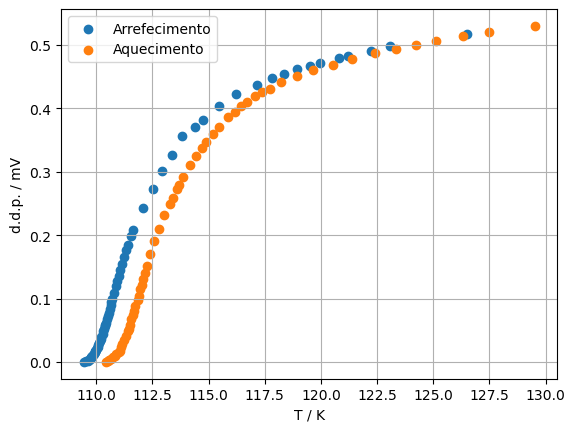

In [13]:
plt.scatter(T1, V1, label = "Arrefecimento")
plt.scatter(T2, V2, label = "Aquecimento")
plt.legend()
plt.xlabel('T / K')
plt.ylabel('d.d.p. / mV')
plt.grid()
plt.show()

In [25]:
V1 = np.array(V1, float)
T1 = np.array(T1, float)
V2 = np.array(V2, float)
T2 = np.array(T2, float)

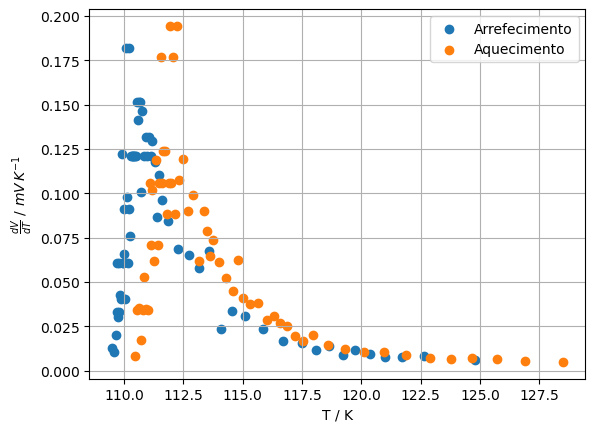

In [40]:
deriv1 = (V1[1:] - V1[:-1])/(T1[1:] - T1[:-1])
mids1 = (T1[1:] + T1[:-1])/2

deriv2 = (V2[1:] - V2[:-1])/(T2[1:] - T2[:-1])
mids2 = (T2[1:] + T2[:-1])/2

plt.scatter(mids1, deriv1, label= 'Arrefecimento')
plt.scatter(mids2, deriv2, label = 'Aquecimento')

plt.xlabel('T / K')
plt.ylabel(r'$\frac{dV}{dT}$ / $mV \, K^{-1}$')
plt.legend()
plt.grid()

In [41]:
max1 = np.argmax(deriv1)
max2 = np.argmax(deriv2)

print(mids1[max1], T1[max1], T1[max1+1])
print(mids2[max2], T2[max2], T2[max2+1])

110.09080188679246 110.09905660377359 110.08254716981133
112.22169811320755 112.1933962264151 112.25


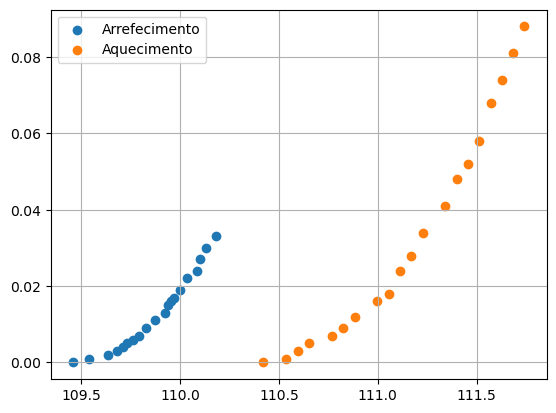

In [14]:
#escolhi ver só os ultimos "last" dados, porque sim 
last = 20
plt.scatter(T1[-last:], V1[-last:], label = "Arrefecimento")
plt.scatter(T2[:last], V2[:last], label = "Aquecimento")
plt.legend()
plt.grid()
plt.show()

## TENTEI COZINHAR COM AJUSTES
# NÃO DEU 😔

In [15]:
def polinomial(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d


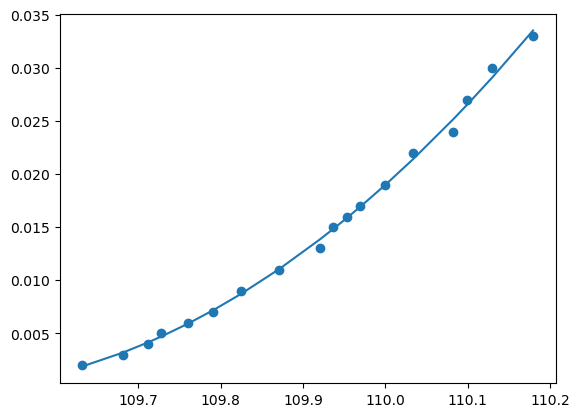

In [16]:
params1, covari1 = emilio(polinomial, T1[-20:-2], V1[-20:-2])
plt.plot(T1[-20:-2], polinomial(T1[-20:-2], *params1))
plt.scatter(T1[-20:-2], V1[-20:-2], label = "Arrefecimento")

In [17]:
def get_zeros(f, x0, x1):
    x2 = x1
    if f(x0, *params1)*f(x1, *params1)<0:
        while abs(f(x2, *params1)) > 1e-3:
            x2 = (x1+x0)/2
            if f(x2, *params1)*f(x1, *params1) > 0:
                x1 = x2
            else:
                x0 = x2
        return x2
    else:
        return "erro pá"
    
                

In [18]:
get_zeros(polinomial, 106, xs[814])

NameError: name 'xs' is not defined

In [19]:
polinomial(109, *params1)

np.float64(0.011976890538136331)

np.int64(814)

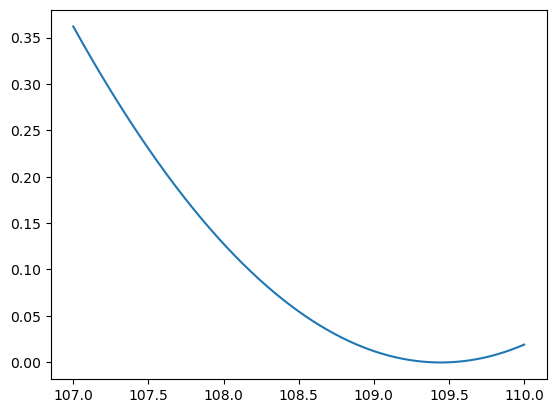

In [20]:
xs = np.linspace(107, 110, 1000)
plt.plot(xs, polinomial(xs, *params1))

xs[np.argmin(polinomial(xs, *params1))]
np.argmin(polinomial(xs, *params1))